In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime

In [2]:
company= 'ADANIENT.NS'
endDate= '2023-01-26'

In [3]:
df= yf.download(company, period='max', end= endDate)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,1.364148,1.401700,1.334259,1.362615,-0.010447,1080397
2002-07-02,1.386372,1.390971,1.356484,1.373344,-0.010529,1016147
2002-07-03,1.371811,1.387139,1.364914,1.373344,-0.010529,980394
2002-07-04,1.379475,1.401700,1.379475,1.381008,-0.010588,972747
2002-07-05,1.388672,1.388672,1.372578,1.377942,-0.010565,974496
...,...,...,...,...,...,...
2023-01-19,3470.000000,3537.699951,3426.699951,3463.550049,3460.088867,3696319
2023-01-20,3450.000000,3477.350098,3440.949951,3456.149902,3452.696045,1510258
2023-01-23,3443.050049,3460.000000,3412.550049,3436.350098,3432.916260,974857


In [4]:
trainSet= df.iloc[:, 1:2].values

In [5]:
df.shape

(5115, 6)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(0,1))

In [7]:
trainingSetScaled= scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [8]:
xTRAIN = []
yTRAIN = []

for i in range(100, len(trainingSetScaled)):
    xTRAIN.append(trainingSetScaled[i-60:i, 0])
    yTRAIN.append(trainingSetScaled[i, 0])
    
xTRAIN, yTRAIN= np.array(xTRAIN), np.array(yTRAIN)

In [9]:
xTRAIN= np.reshape(xTRAIN, newshape=(xTRAIN.shape[0], xTRAIN.shape[1], 1))

In [10]:
trainingSetScaled.shape

(5115, 1)

In [11]:
xTRAIN.shape

(5015, 60, 1)

In [12]:
yTRAIN.shape

(5015,)

In [13]:
import tensorflow as tf
from tensorflow import keras


if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

In [14]:
regressor= keras.models.Sequential([
    keras.layers.LSTM(units=84, return_sequences= True, input_shape= (xTRAIN.shape[1], 1)),
    keras.layers.Dropout(rate= 0.2),
    keras.layers.LSTM(units=64, return_sequences= True), 
    keras.layers.Dropout(rate= 0.2),
    keras.layers.LSTM(units=50), 
    keras.layers.Dropout(rate= 0.2),
    keras.layers.Dense(units= 1)
])

In [15]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 84)            28896     
                                                                 
 dropout (Dropout)           (None, 60, 84)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            38144     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                23000     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [16]:
regressor.compile(optimizer= 'adam', loss= keras.losses.mean_squared_error, metrics=['accuracy'])

In [41]:
regressor.fit(x= xTRAIN, y=yTRAIN, batch_size= 32, epochs= 150)

Epoch 1/150
157/157 [==============================] - 3s 21ms/step - loss: 2.2120e-04 - accuracy: 3.9880e-04
Epoch 2/150
157/157 [==============================] - 5s 31ms/step - loss: 2.1763e-04 - accuracy: 3.9880e-04
Epoch 3/150
157/157 [==============================] - 7s 42ms/step - loss: 2.5907e-04 - accuracy: 3.9880e-04
Epoch 4/150
157/157 [==============================] - 5s 29ms/step - loss: 2.1708e-04 - accuracy: 3.9880e-04
Epoch 5/150
157/157 [==============================] - 5s 29ms/step - loss: 1.9715e-04 - accuracy: 3.9880e-04
Epoch 6/150
157/157 [==============================] - 5s 29ms/step - loss: 2.4411e-04 - accuracy: 3.9880e-04
Epoch 7/150
157/157 [==============================] - 4s 25ms/step - loss: 2.1965e-04 - accuracy: 3.9880e-04
Epoch 8/150
157/157 [==============================] - 3s 22ms/step - loss: 2.2819e-04 - accuracy: 3.9880e-04
Epoch 9/150
157/157 [==============================] - 3s 20ms/step - loss: 2.2553e-04 - accuracy: 3.9880e-04
Epoch 10/1

In [18]:
prdctn= regressor.predict(xTRAIN)

157/157 [==============================] - 2s 8ms/step


regressor.save(f"../model/exports/{company}/")

In [19]:
testDF= yf.download(company, period='1d', start=endDate, end=datetime.datetime.now())
testDF

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-27,3335.000000,3346.500000,2712.000000,2761.449951,2758.690430,14764368
2023-01-30,2850.000000,3037.550049,2665.000000,2892.850098,2889.959229,20947906
2023-01-31,2980.000000,3073.600098,2906.000000,2973.899902,2970.927979,11568020
2023-02-01,2995.000000,3010.750000,1941.199951,2135.350098,2133.216064,13525314
2023-02-02,2348.850098,2348.850098,1494.750000,1565.250000,1563.685791,34474080
...,...,...,...,...,...,...
2023-07-17,2399.899902,2459.500000,2391.300049,2408.550049,2408.550049,3090373
2023-07-18,2415.000000,2510.000000,2405.199951,2416.899902,2416.899902,5978272
2023-07-19,2428.649902,2443.000000,2416.899902,2423.750000,2423.750000,1637260


In [20]:
realCP= testDF['Close'].values

In [21]:
dfTotal= pd.concat((df['Close'], testDF['Close']), axis=0)

In [22]:
modelInp= dfTotal[len(dfTotal)-len(testDF)-60:].values

In [23]:
modelInp= modelInp.reshape(-1,1)

In [24]:
modelInp= scaler.transform(modelInp)

In [25]:
xTEST= []

for i in range(60, len(modelInp)):
    xTEST.append(modelInp[i-60:i, 0])

xTEST= np.array(xTEST)

In [26]:
xTEST.shape

(119, 60)

In [27]:
xTEST= np.reshape(xTEST, newshape= (xTEST.shape[0], xTEST.shape[1], 1))

In [28]:
#pred = pred[..., 0]

In [29]:
pred= regressor.predict(xTEST)

4/4 [==============================] - 0s 11ms/step


In [30]:
pred= scaler.inverse_transform(pred)

In [31]:
pred.shape

(119, 1)

In [32]:
import matplotlib.pyplot as plt

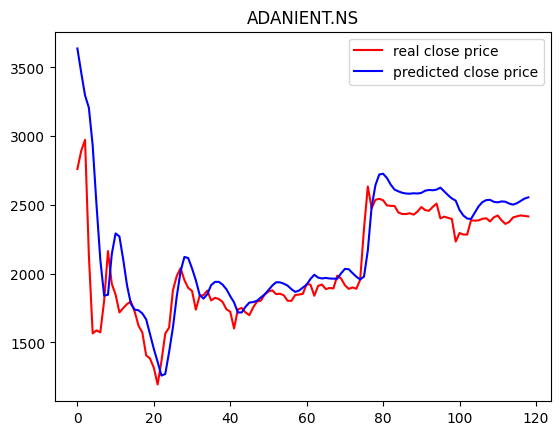

In [33]:
plt.plot(realCP, color= 'r', label= 'real close price')
plt.plot(pred, color= 'b', label= 'predicted close price')
plt.title(company)
plt.legend()
plt.show()

In [34]:
realData= [modelInp[len(modelInp)+1-60:len(modelInp+1), 0]]

In [35]:
realData= np.array(realData)

In [36]:
realData= np.reshape(realData, newshape=(realData.shape[0], realData.shape[1], 1))

In [37]:
prediction= regressor.predict(realData)

1/1 [==============================] - 1s 872ms/step


In [38]:
prediction= scaler.inverse_transform(prediction)

In [39]:
prediction

array([[2555.9048]], dtype=float32)

In [40]:
# Load your Keras model
#model = tf.keras.models.load_model('../model/exports/ITC.NS/')

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(regressor)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.experimental_lower_tensor_list_ops = False  # Disable lowering of tensor list ops
tflite_model = converter.convert()

# Save the converted TensorFlow Lite model
#tflite_model_path = f"D:\Code\Projects\stockSenseAPIv2\exports\{company}.tflite"
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Rohan\AppData\Local\Temp\tmpc5s7ivy1\assets


INFO:tensorflow:Assets written to: C:\Users\Rohan\AppData\Local\Temp\tmpc5s7ivy1\assets


NameError: name 'tflite_model_path' is not defined